# COMP 4605 SPRING 2021

## Project: Analyzing Airbnb House Data in Istanbul And Amount Of Waste in Istanbul
## Name: Mert Berkan Akdeniz
## Id: 217CS2014

# Abstract

#### Since 2008, Airbnb has gained a serious position in the real estate market with the use of tourists. In this research, together with the 2020 Istanbul Airbnb Open Data, it was a research where I compared the amount of household waste between 2004 and 2020 according to Istanbul districts, analyzed and answered my hypotheses.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from scipy import stats

# First of all we need to load datasets
I am merging two datasets which are Istanbul Airbnb dataset and Amount of Waste in Istanbul

In [2]:
a = pd.read_csv("listings.csv")
b = pd.read_csv("evselatik.csv")
data = pd.merge(a, b, 
                   on='neighbourhood', 
                   how='left')

In [3]:
data.head(100)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,4826,The Place,6603,Kaan,NaN,Uskudar,41.05650,29.05367,Entire home/apt,720,...,"194,205","197,946","209,640","232,230","240,980","240,871","261,834","236,577","222,645","208,926"
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,816,...,"108,720","111,260","121,377","129,396","128,561","128,516","130,158","126,774","123,926","101,829"
2,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,NaN,Beyoglu,41.03254,28.98153,Entire home/apt,233,...,"125,928","124,270","134,704","142,168","133,197","131,076","133,016","137,333","133,928","115,602"
3,28277,Duplex Apartment with Terrace,121607,Alen,NaN,Sisli,41.04471,28.98567,Hotel room,761,...,"163,506","170,532","188,802","175,526","164,771","163,725","166,507","165,582","157,137","131,295"
4,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.09048,29.05559,Entire home/apt,823,...,"114,470","117,489","126,390","82,909","169,793","171,982","161,384","172,141","164,783","161,272"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,265772,Furnished Flats & Historical Room,1393796,Hülya,NaN,Sisli,41.05458,28.98672,Private room,274,...,"163,506","170,532","188,802","175,526","164,771","163,725","166,507","165,582","157,137","131,295"
96,270561,"Room minuet 2TRAM Street,Yusufpasha اتفضلوااهل...",1351134,Bãśmä,NaN,Fatih,41.01077,28.94512,Private room,96,...,"229,842","240,951","273,050","268,012","251,503","245,412","255,556","254,120","234,880","193,755"
97,270883,only 10 minutes to Sultanahmet,1417732,Tayfun,NaN,Fatih,41.02480,28.94738,Entire home/apt,384,...,"229,842","240,951","273,050","268,012","251,503","245,412","255,556","254,120","234,880","193,755"
98,271439,Charming Delightful Studio@Centre 3,466302,Demir,NaN,Beyoglu,41.02669,28.97594,Entire home/apt,213,...,"125,928","124,270","134,704","142,168","133,197","131,076","133,016","137,333","133,928","115,602"


# Before starting analyze, I start by extracting data that won't work for me in my analysis and filling the 0 value for null values

In [4]:
data.drop(['name','id','host_id','host_name','last_review','neighbourhood_group'], axis=1, inplace=True)
data['reviews_per_month'].fillna(0, inplace=True)
a.drop(['name','id','host_id','host_name','last_review','neighbourhood_group'], axis=1, inplace=True)
a['reviews_per_month'].fillna(0, inplace=True)

## Lets check data types of dataset before use them

In [5]:
data.dtypes

neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
Veri Türü (Data Type)              object
2004                               object
2005                               object
2006                               object
2007                               object
2008                               object
2009                               object
2010                               object
2011                               object
2012                               object
2013                               object
2014                               object
2015                               object
2016                              

In [6]:
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,23728.000000,23728.000000,23728.000000,23728.000000,23728.000000,23728.000000,23728.000000,23728.000000
mean,41.028416,28.982111,484.643248,4.525202,7.870828,0.339794,5.861767,227.709921
std,0.045713,0.127503,1973.884093,27.614191,23.229127,0.718269,16.535368,146.607077
min,40.813960,28.019010,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,41.005120,28.973210,137.000000,1.000000,0.000000,0.000000,1.000000,89.000000
50%,41.031850,28.983485,247.000000,1.000000,0.000000,0.000000,2.000000,302.000000
75%,41.048530,29.020050,446.000000,3.000000,4.000000,0.300000,5.000000,365.000000
max,41.479030,29.907780,76922.000000,1125.000000,345.000000,9.200000,176.000000,365.000000


## Let's examine the distribution of data by column by extracting histogram of our data

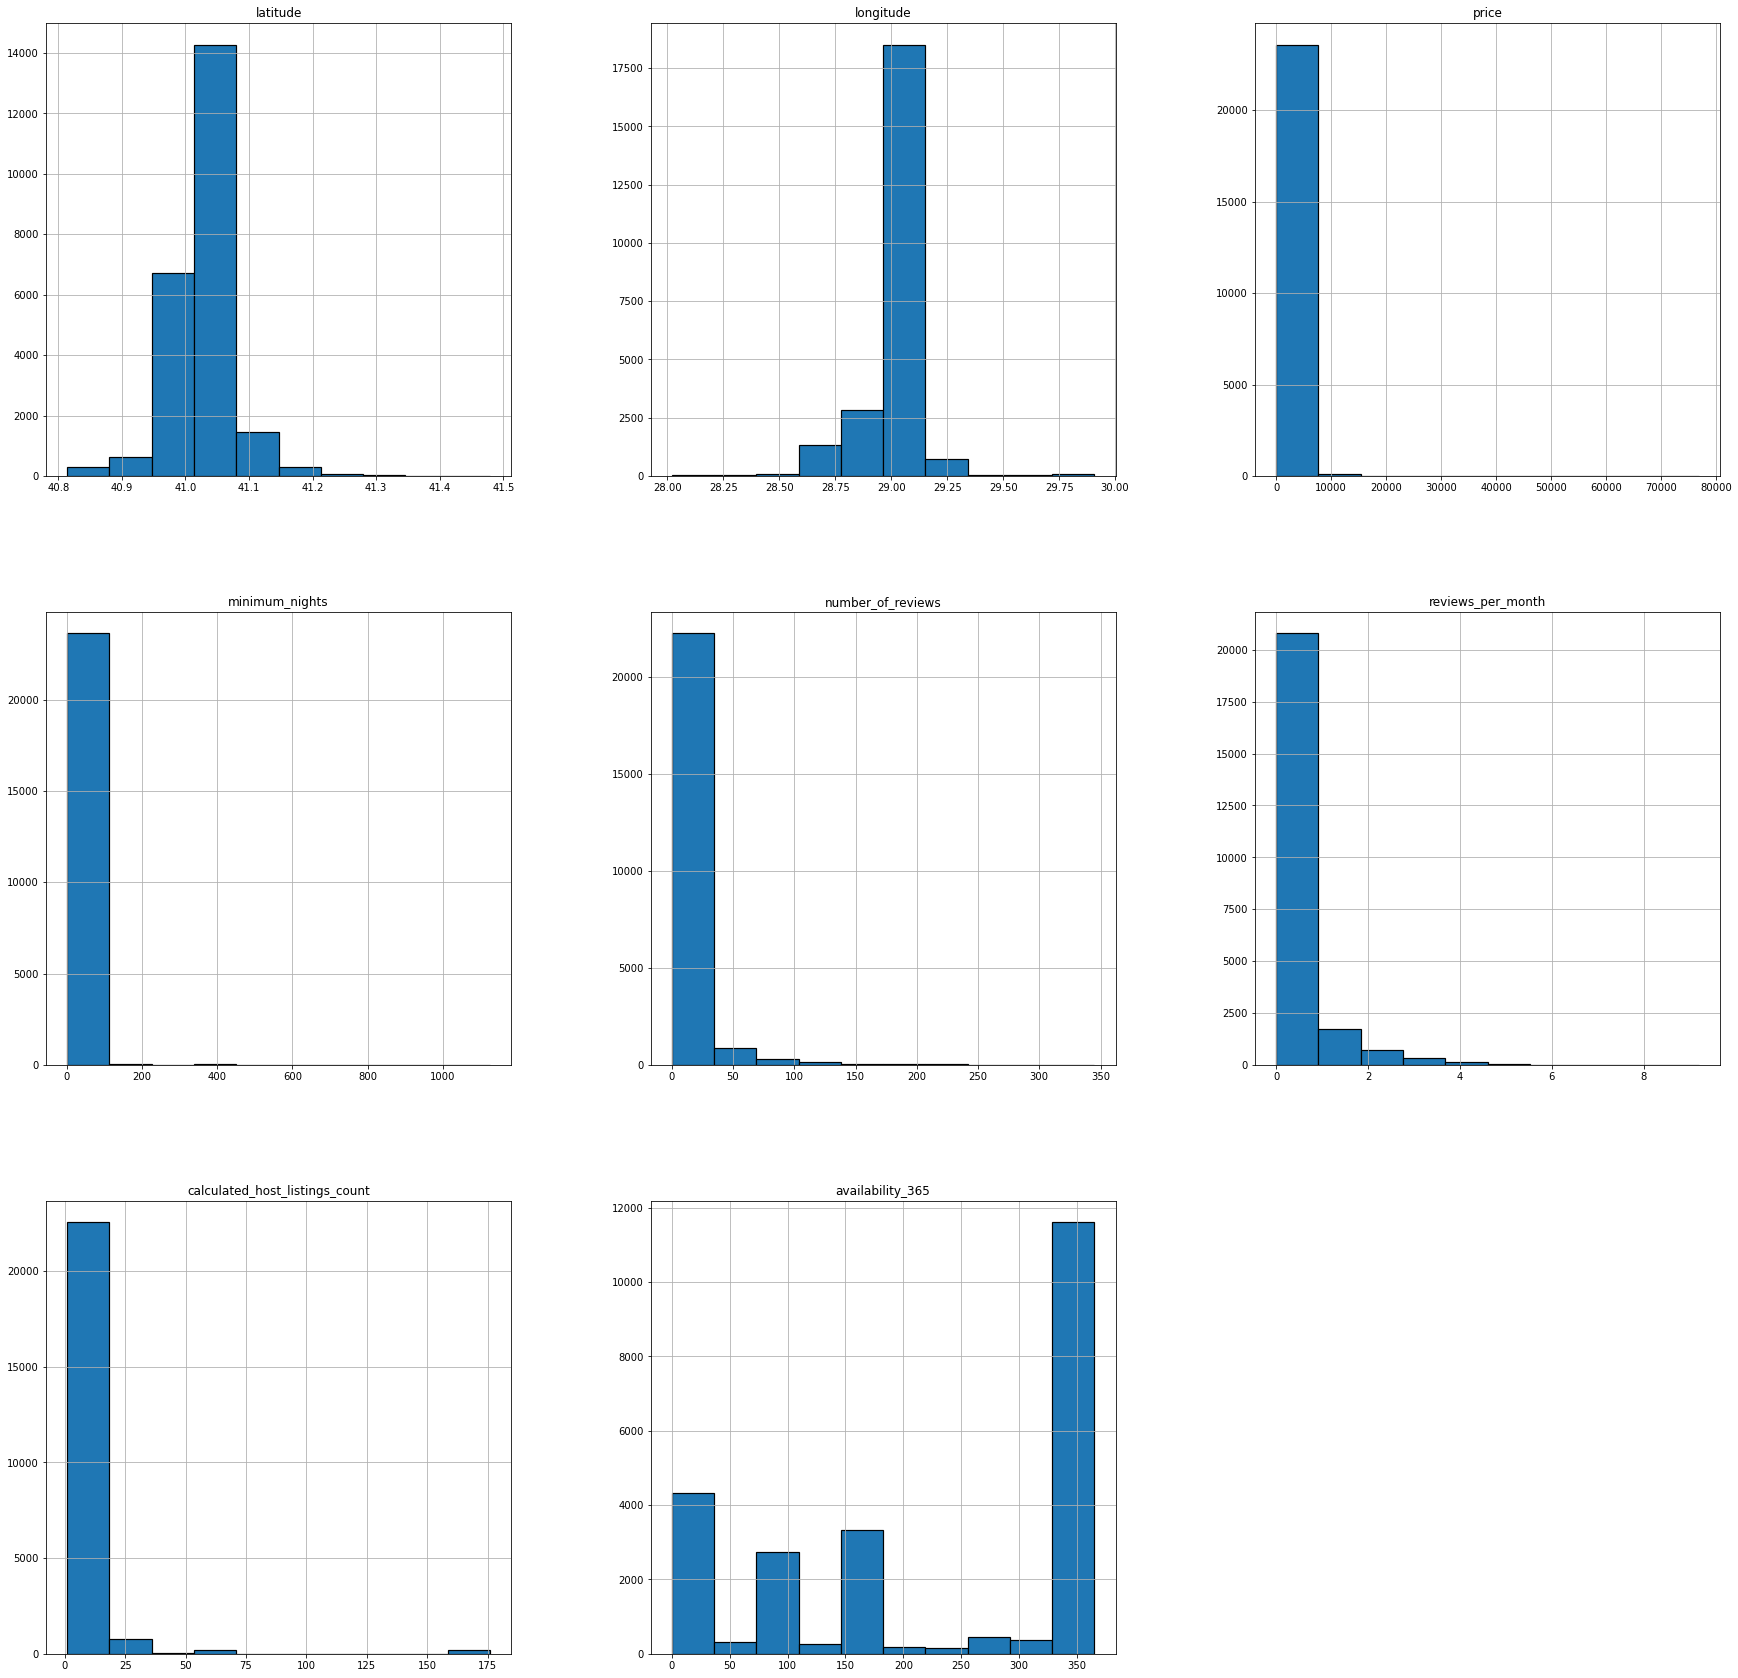

In [7]:
data.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30));

In [8]:
categorical_col = []
for column in data.columns:
    if column == "neighbourhood" or column == "room_type":
        categorical_col.append(column)
categorical_col

['neighbourhood', 'room_type']

## Which house type is the most in the listings?

## At first, when we examined our dataset, we noticed that there were advertisements for different room types.
 Let's examine which type of room is on the dataset using bar char. Looking at the results, we see that we have the most home listings in general and the least shared room listings

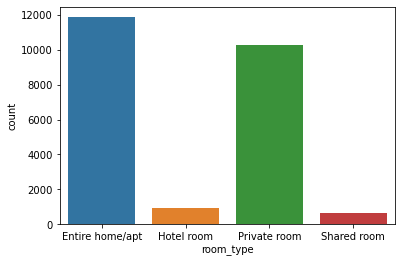

In [9]:
compareRoom = sea.countplot(x="room_type", data=data)

### We need to check the data we have for anything that's not worth it. In this way, we can achieve more realistic results in our analysis.

In [10]:
data.isnull().sum()

neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
Veri Türü (Data Type)             0
2004                              0
2005                              0
2006                              0
2007                              0
2008                              0
2009                              0
2010                              0
2011                              0
2012                              0
2013                              0
2014                              0
2015                              0
2016                              0
2017                              0
2018                              0
2019                              0
2020                        

### According the result we can see that we do not have any null value so We can move forward more reliably

### Let's examine the changes in the prices of room typæes according to the districts with the help of graphics. In this way, we can find the district for the type of house we want in accordance with our budget.

<AxesSubplot:xlabel='neighbourhood', ylabel='price'>

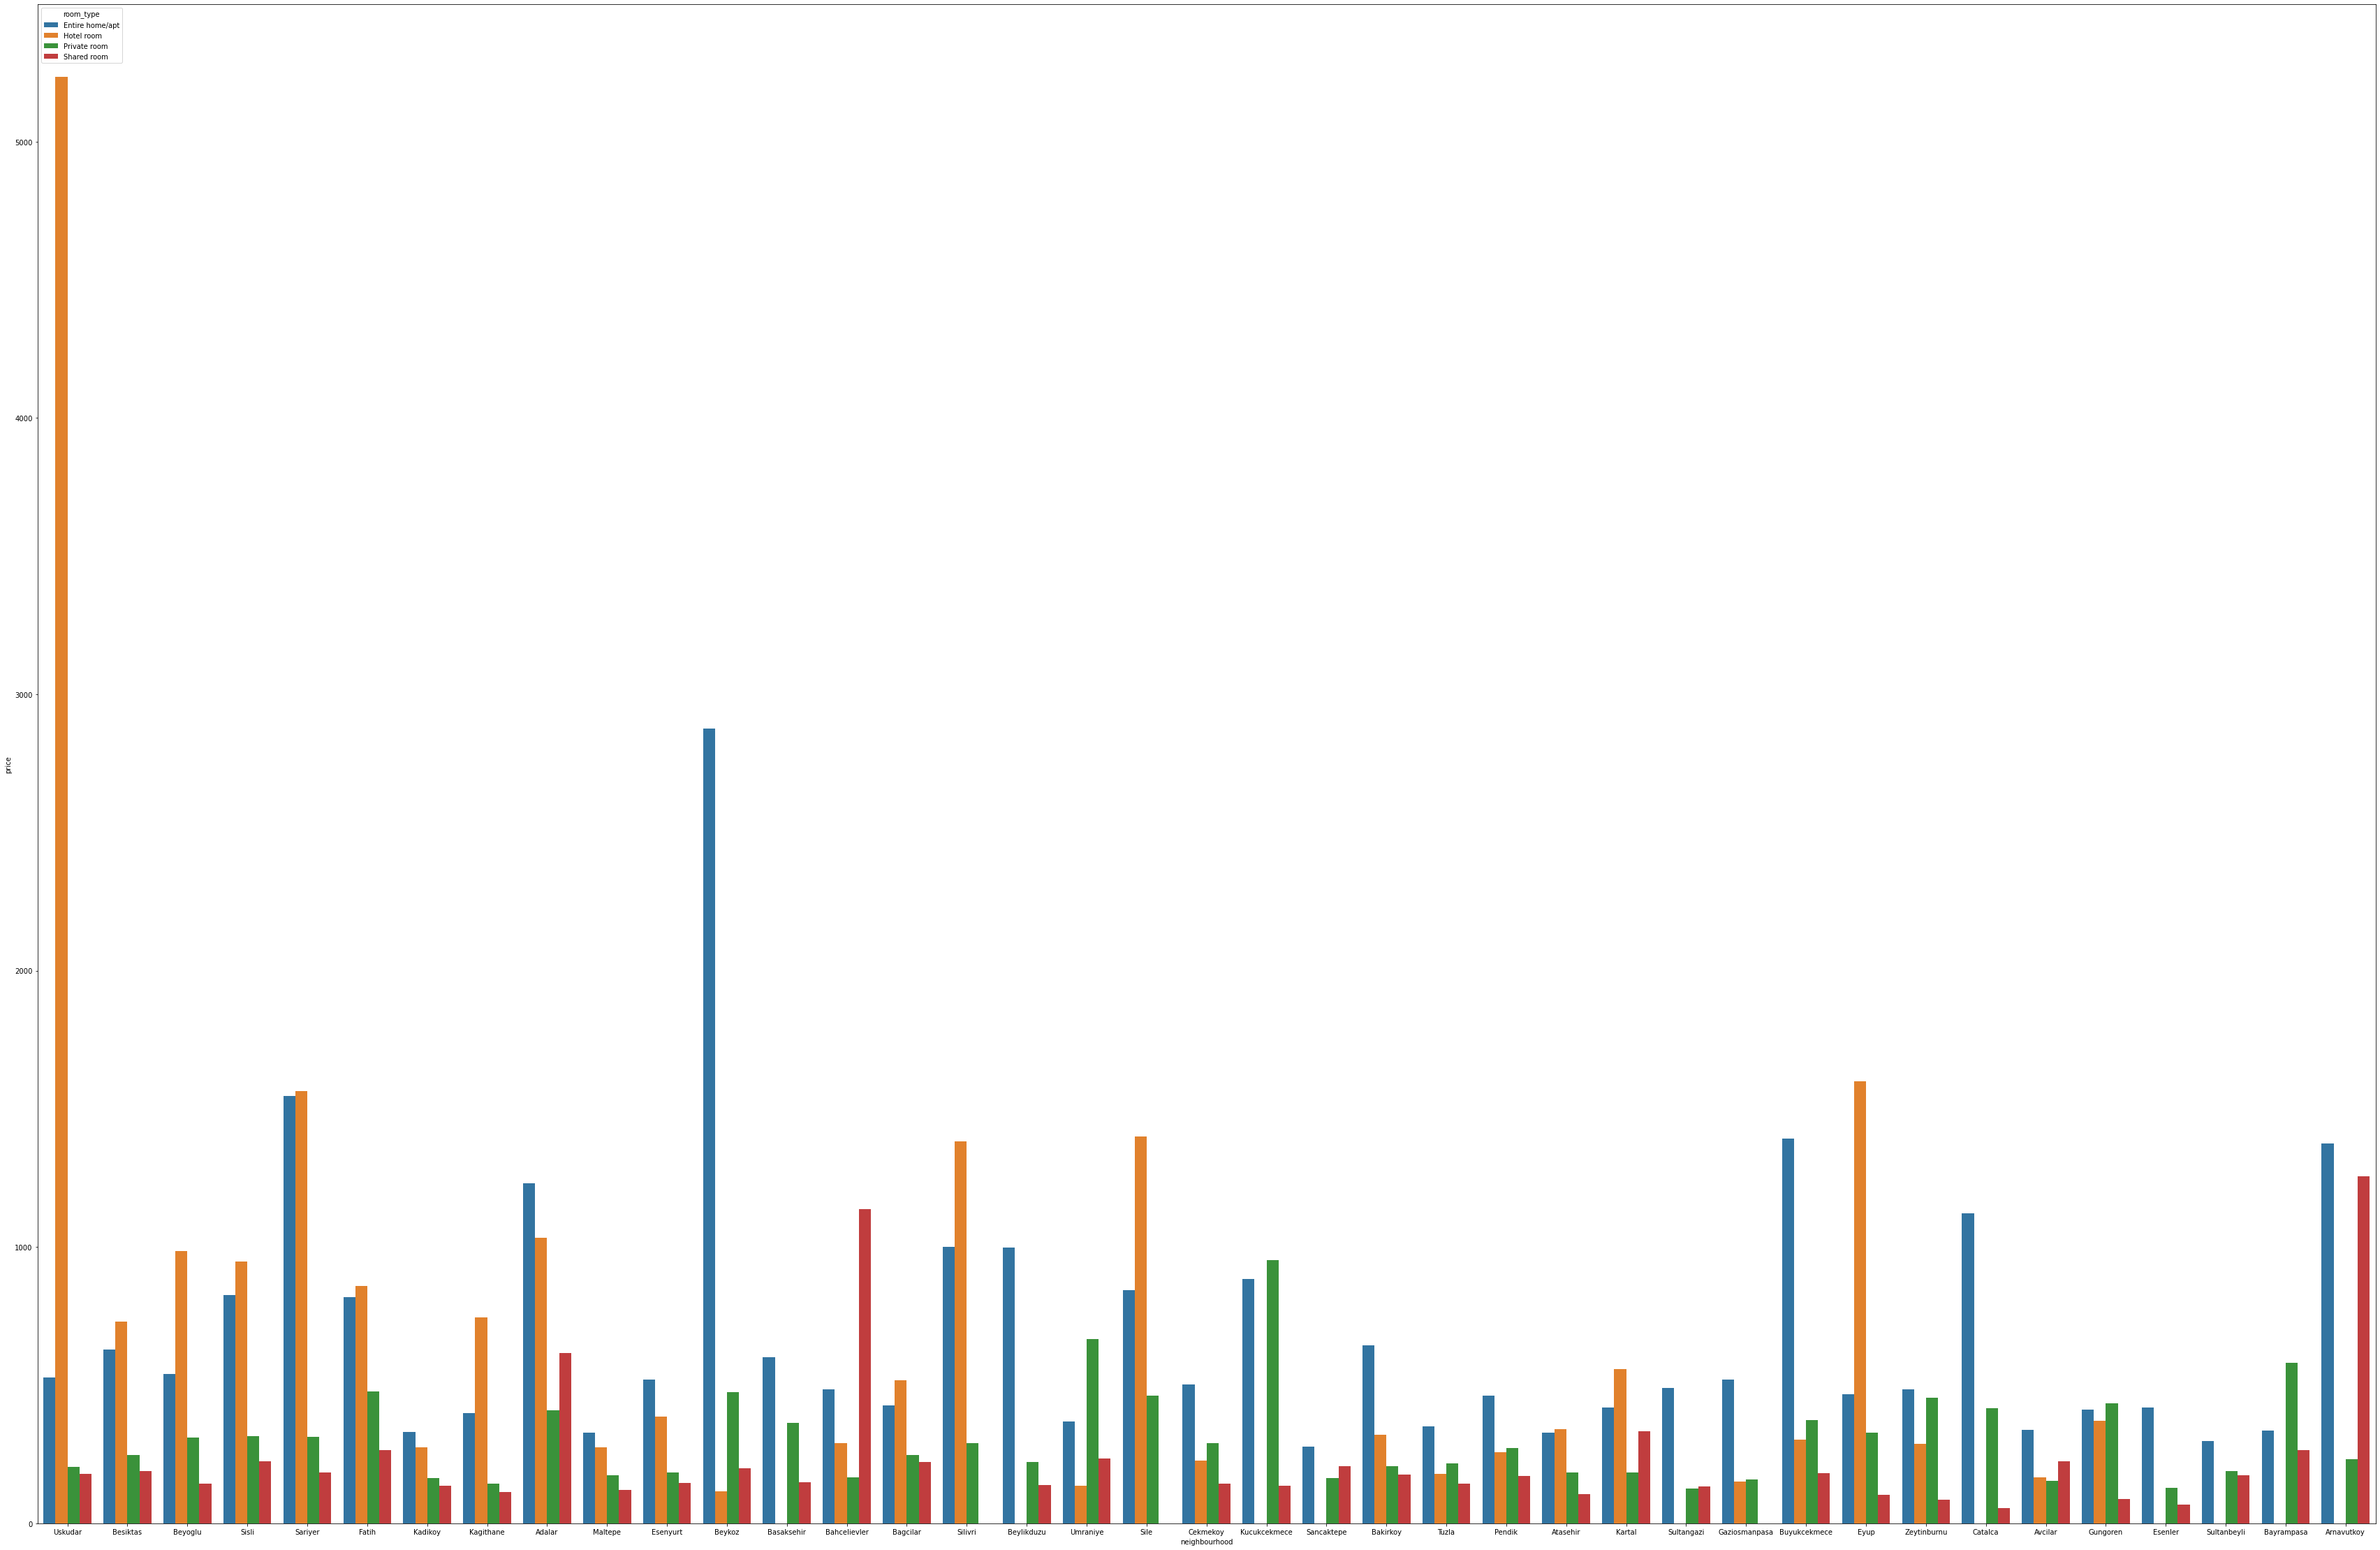

In [11]:
plt.figure(figsize=(60, 40))
neighbourhood = data.neighbourhood
price = data.price
roomType = data.room_type
sea.barplot(x=neighbourhood, y=price, hue=roomType, ci=None)

### According to our data, we see that the most expensive hotel is in Üsküdar, the most expensive house advertisement is in Beykoz, the most expensive private room is in Küçükçekmece and the most expensive common room is in Arnavutköy.

## Which neighborhood has the most home listings?

### Let's examine the 10 neighbourhood that host the top 10 neighbourhood

<BarContainer object of 10 artists>

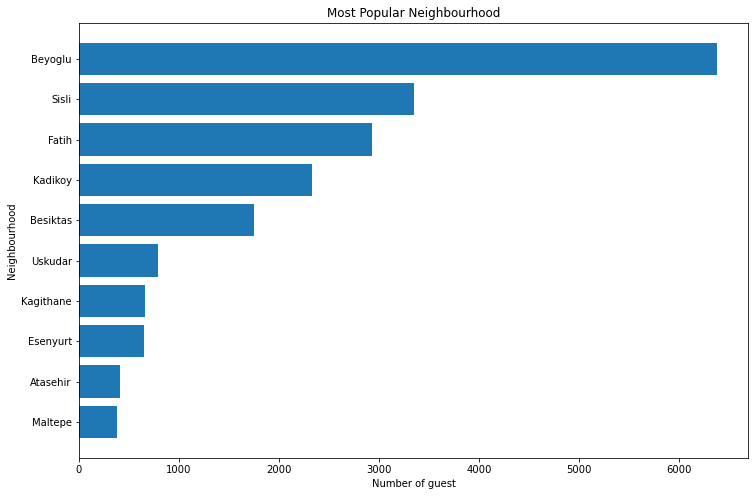

In [12]:
dataNeighbour = data.neighbourhood.value_counts()[:10]
plt.figure(figsize=(12, 8))
xNeighbour = list(dataNeighbour.index)
yNeighbour = list(dataNeighbour.values)
xNeighbour.reverse()
yNeighbour.reverse()
plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood")
plt.xlabel("Number of guest")

plt.barh(xNeighbour, yNeighbour)

### According to result we can see the most popular neighbourhood is Beyoglu

### We saw the famous neighbourhood on top so they can be famous but, let's check their reviews number for top 5 neighbourhood
## Is there a direct proportion between popularity and reviews of number?

Reviews number of Beyoglu: 98178
Reviews number of Sisli: 13580
Reviews number of Fatih: 40209
Reviews number of Kadikoy: 11198
Reviews number of Besiktas: 7519
Reviews number of Uskudar: 2165


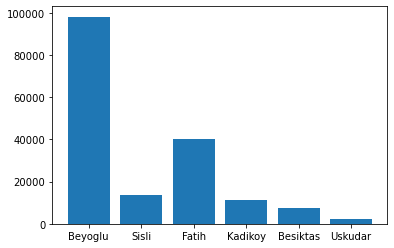

In [13]:
BeyogluReviews = data[data['neighbourhood'] == "Beyoglu"].sum().number_of_reviews
SisliReviews = data[data['neighbourhood'] == "Sisli"].sum().number_of_reviews
FatihReviews = data[data['neighbourhood'] == "Fatih"].sum().number_of_reviews
KadikoyReviews = data[data['neighbourhood'] == "Kadikoy"].sum().number_of_reviews
BesiktasReviews = data[data['neighbourhood'] == "Besiktas"].sum().number_of_reviews
UskudarReviews = data[data['neighbourhood'] == "Uskudar"].sum().number_of_reviews

neighbourhoods = ["Beyoglu", "Sisli", "Fatih", "Kadikoy", "Besiktas", "Uskudar"]
neighbourhoodsReviews = [BeyogluReviews,SisliReviews,FatihReviews,KadikoyReviews,BesiktasReviews,UskudarReviews]
print("Reviews number of Beyoglu:",BeyogluReviews)
print("Reviews number of Sisli:",SisliReviews)
print("Reviews number of Fatih:",FatihReviews)
print("Reviews number of Kadikoy:",KadikoyReviews)
print("Reviews number of Besiktas:",BesiktasReviews)
print("Reviews number of Uskudar:",UskudarReviews)

plt.bar(neighbourhoods,neighbourhoodsReviews)
plt.show()


## What are the price averages by neighborhood?

Text(0.5, 1.0, 'Average Price of Neighbourhoods')

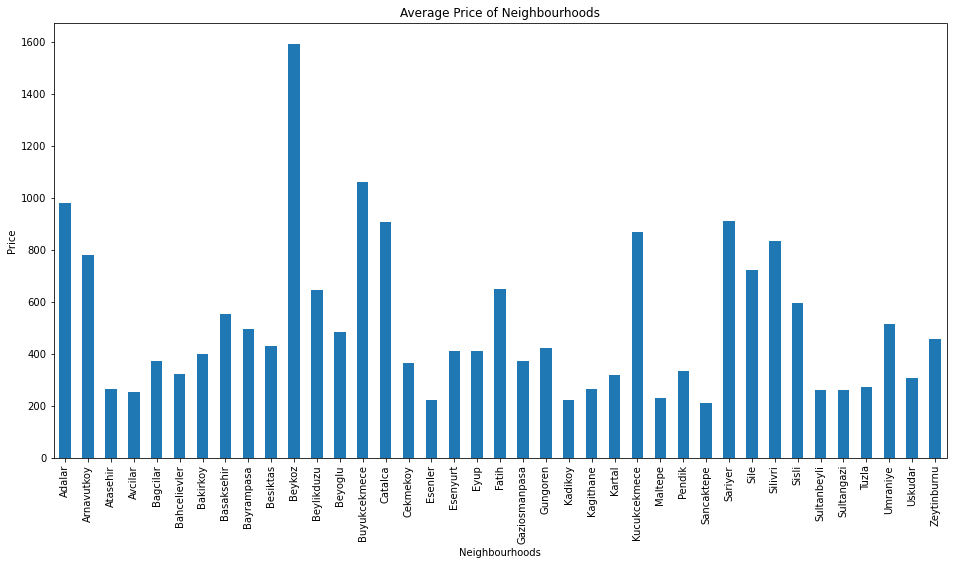

In [14]:
neighbourhoodPrice = data["price"].groupby([data.neighbourhood]).mean()
plt.figure(figsize=(16, 8))
priceBar = neighbourhoodPrice.plot(kind = "bar")
priceBar.set_xlabel('Neighbourhoods')
priceBar.set_ylabel('Price')
priceBar.set_title("Average Price of Neighbourhoods")

### According to popularity, we saw that while Sisli was in the second place, Fatih was in the third place, but when we look at the reviews of the number, we see that Fatih has more reviews. Thus, we cannot say for sure that the most popular place has the most reviews.

### Let's examine the annual occupancy by neighbourhood.

<AxesSubplot:xlabel='neighbourhood', ylabel='availability_365'>

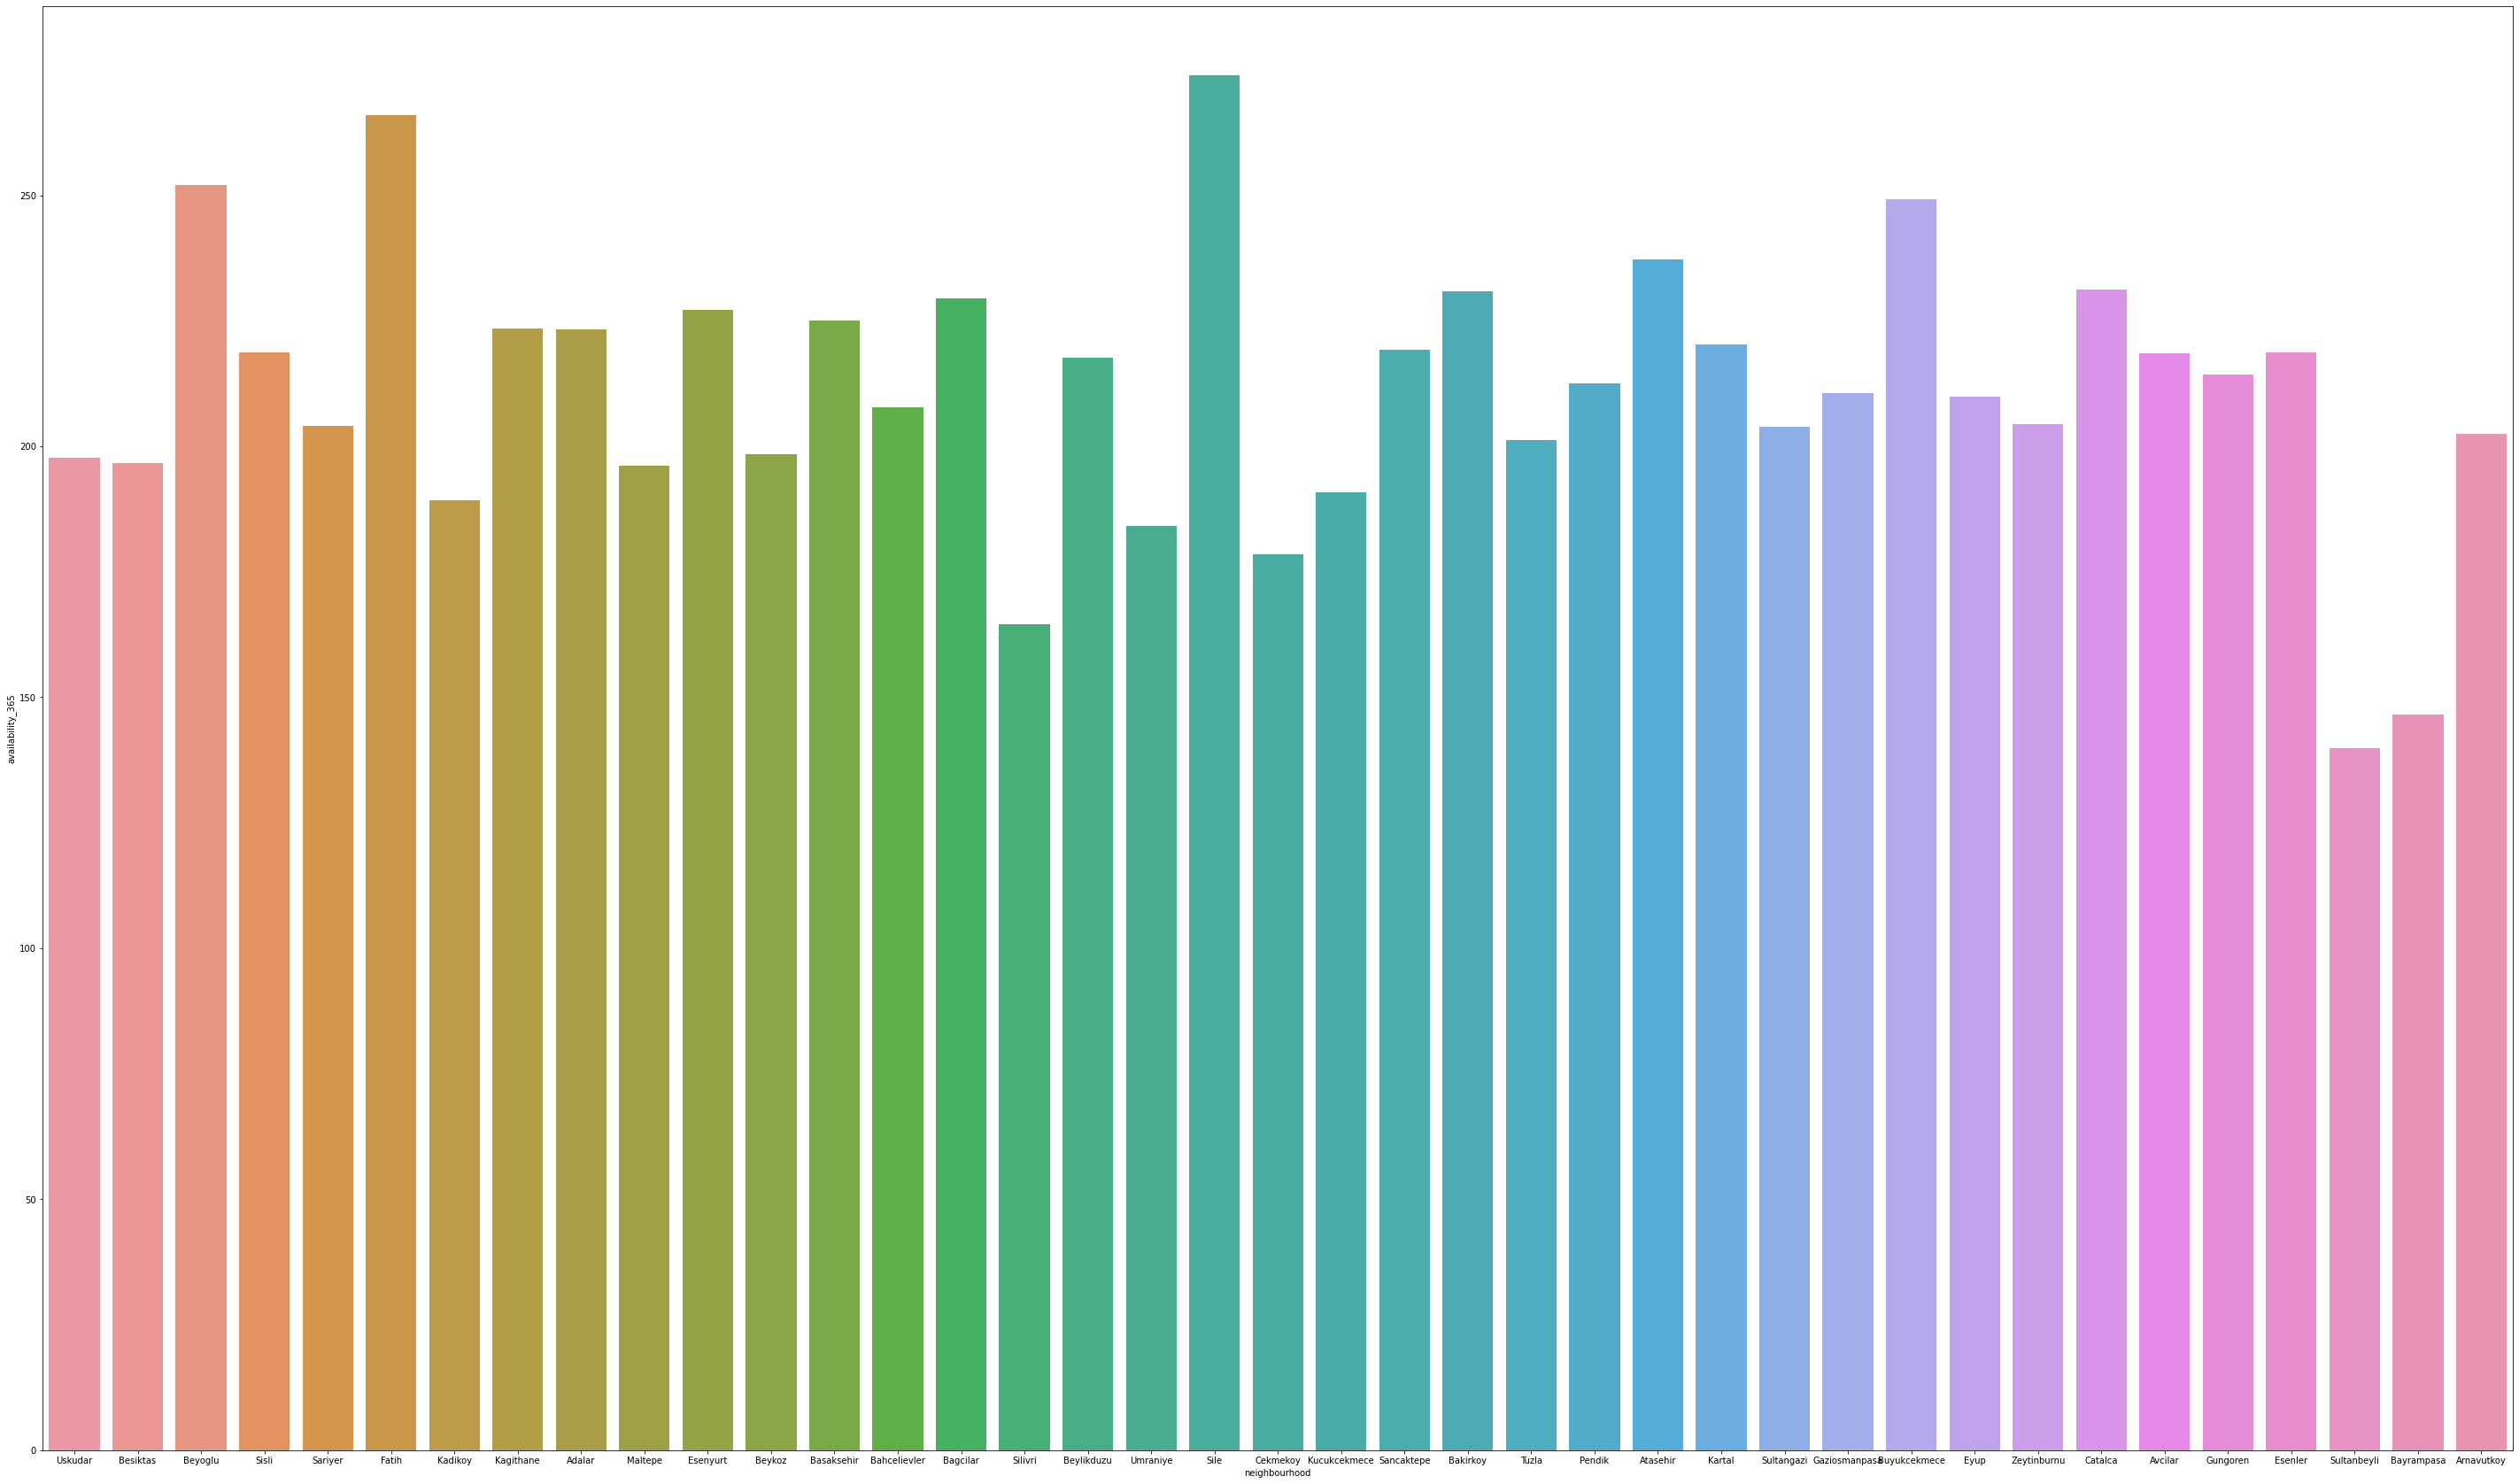

In [15]:
plt.figure(figsize=(50, 30))
sea.barplot(x=neighbourhood, y=data.availability_365, data=data, ci=None)

### See what Istanbul looks like by uploading a map view of Istanbul.

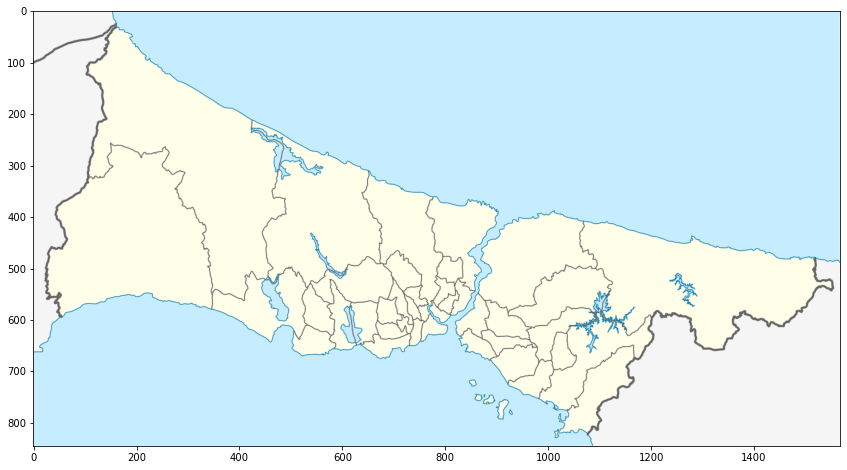

In [16]:
img = mpimg.imread('istanbul.png') 
np.save("istanbul",img)
plt.figure(figsize=(16,8))
plt.imshow(img)

## Now, let's try to map according to the latitude and longitude of our own data.

### Let's map according to our neighbourhoods at first and have information about the locations of the neighbourhoods.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

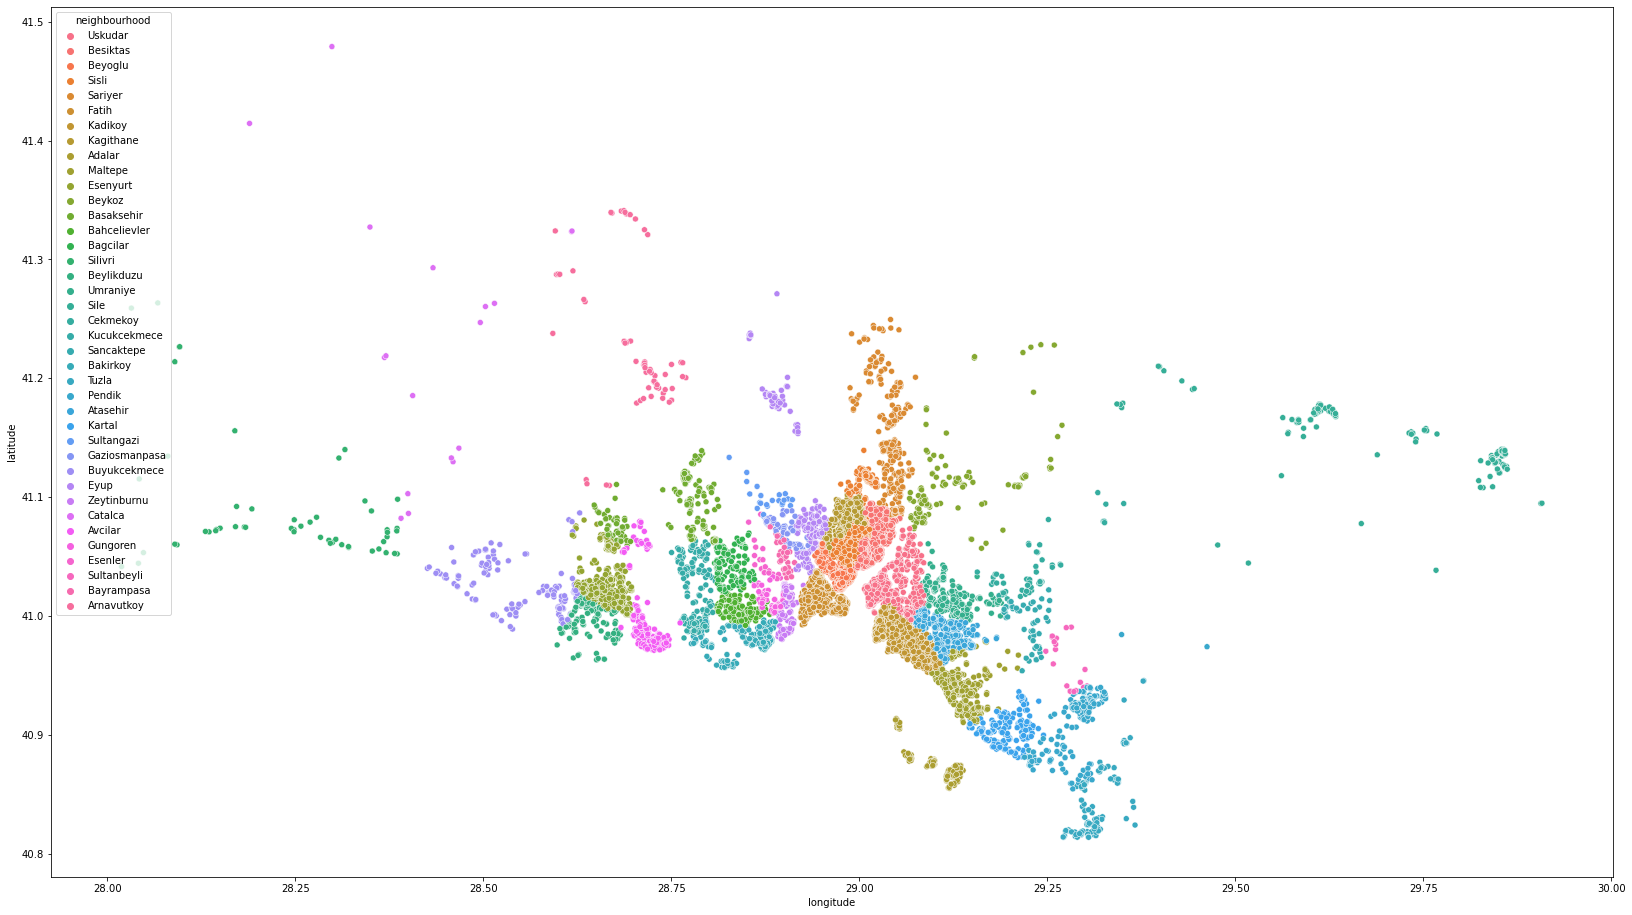

In [17]:
plt.figure(figsize=(28, 16))
sea.scatterplot(x=data.longitude,y=data.latitude,hue=data.neighbourhood)

### Mapping according to room types

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

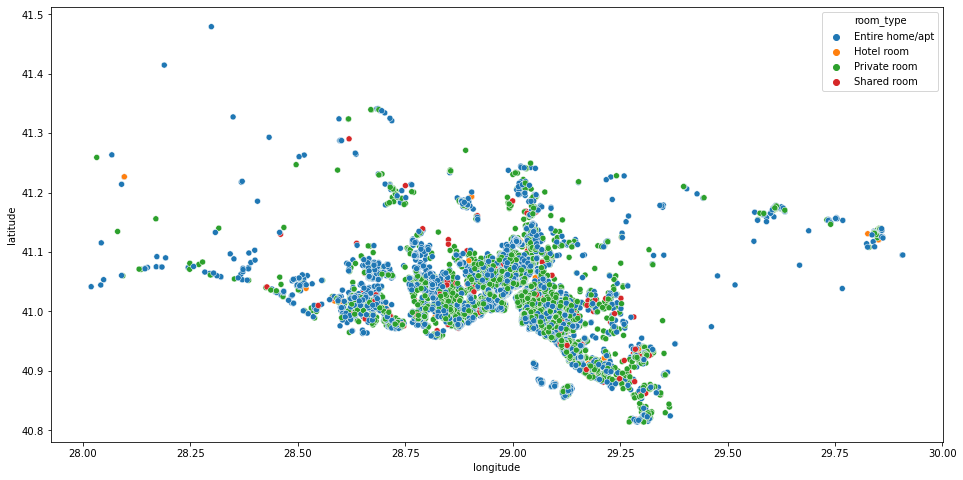

In [18]:
plt.figure(figsize=(16,8))
sea.scatterplot(x=data.longitude,y=data.latitude,hue=data.room_type)

### Mapping by yearly availability

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

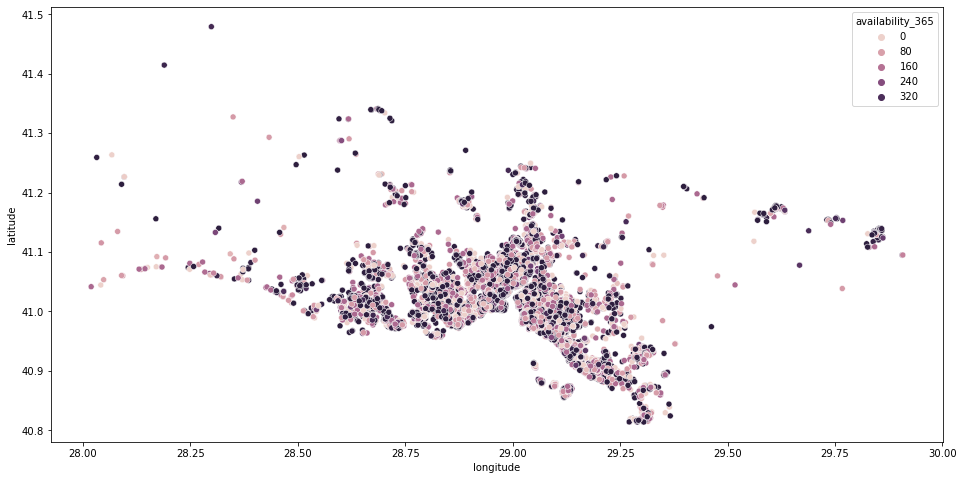

In [19]:
plt.figure(figsize=(16,8))
sea.scatterplot(x=data.longitude,y=data.latitude,hue=data.availability_365)

### Let's examine the ads under the price of 1000

In [20]:
price = data[data["price"]<1000]
price

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Uskudar,41.05650,29.05367,Entire home/apt,720,1,1,0.01,1,365,...,"194,205","197,946","209,640","232,230","240,980","240,871","261,834","236,577","222,645","208,926"
1,Besiktas,41.06984,29.04545,Entire home/apt,816,365,41,0.33,2,279,...,"108,720","111,260","121,377","129,396","128,561","128,516","130,158","126,774","123,926","101,829"
2,Beyoglu,41.03254,28.98153,Entire home/apt,233,30,13,0.19,1,289,...,"125,928","124,270","134,704","142,168","133,197","131,076","133,016","137,333","133,928","115,602"
3,Sisli,41.04471,28.98567,Hotel room,761,3,0,0.00,19,365,...,"163,506","170,532","188,802","175,526","164,771","163,725","166,507","165,582","157,137","131,295"
4,Sariyer,41.09048,29.05559,Entire home/apt,823,3,0,0.00,1,88,...,"114,470","117,489","126,390","82,909","169,793","171,982","161,384","172,141","164,783","161,272"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23723,Avcilar,40.97870,28.72668,Private room,171,1,0,0.00,2,175,...,"115,190","119,614","132,095","147,880","183,128","171,638","164,914","161,040","155,042","151,971"
23724,Sisli,41.11798,29.00886,Entire home/apt,597,1,0,0.00,15,363,...,"163,506","170,532","188,802","175,526","164,771","163,725","166,507","165,582","157,137","131,295"
23725,Beyoglu,41.03839,28.98831,Private room,144,1,0,0.00,7,210,...,"125,928","124,270","134,704","142,168","133,197","131,076","133,016","137,333","133,928","115,602"
23726,Esenyurt,41.01065,28.67427,Entire home/apt,603,2,0,0.00,1,90,...,"169,806","188,345","231,725","262,349","281,306","323,710","351,365","369,769","356,789","384,469"


# Correlation

### Now let's examine the relationship between the columns in our data with correlation.

Index(['neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'Veri Türü (Data Type)', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020'],
      dtype='object')

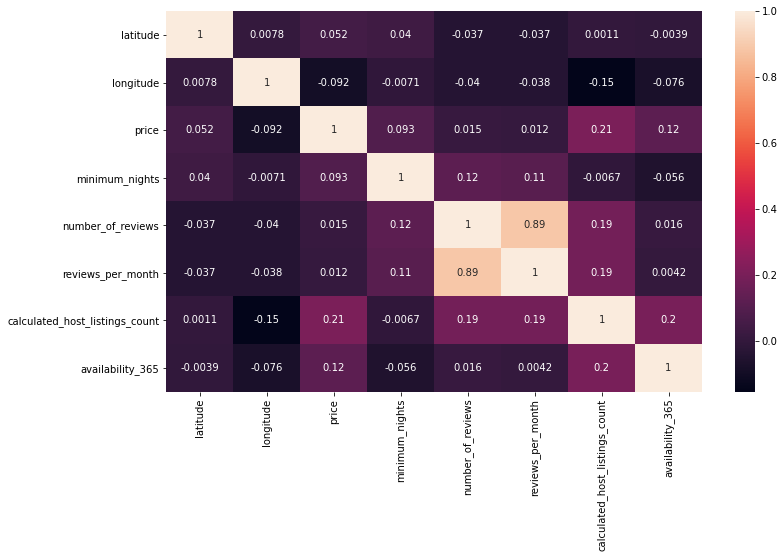

In [21]:
corr = data.corr(method='kendall')
plt.figure(figsize=(12,7))
sea.heatmap(corr, annot=True)
data.columns

### There is the highest correlation relationship between number_of_reviews and reviews_per_mounth. This means that we can interpret that the two are interconnected and have a directly proportional relationship with each other.

### According to the correlation table, we can say that there are generally small relationships between them for our other columns. Our columns longitude and calculated_host_listings_count have the greatest negative correlation. However, since this value is -0.15, we can say that they have a small negative relationship.

### There is a minimum number of days to be rented for each ad to be rented. These can take different forms such as 1-3-5-10. Let's take a look at how many days we need to rent on average for each district. In this review, we need to remove the same districts in order not to experience confusion while taking the average of each data.

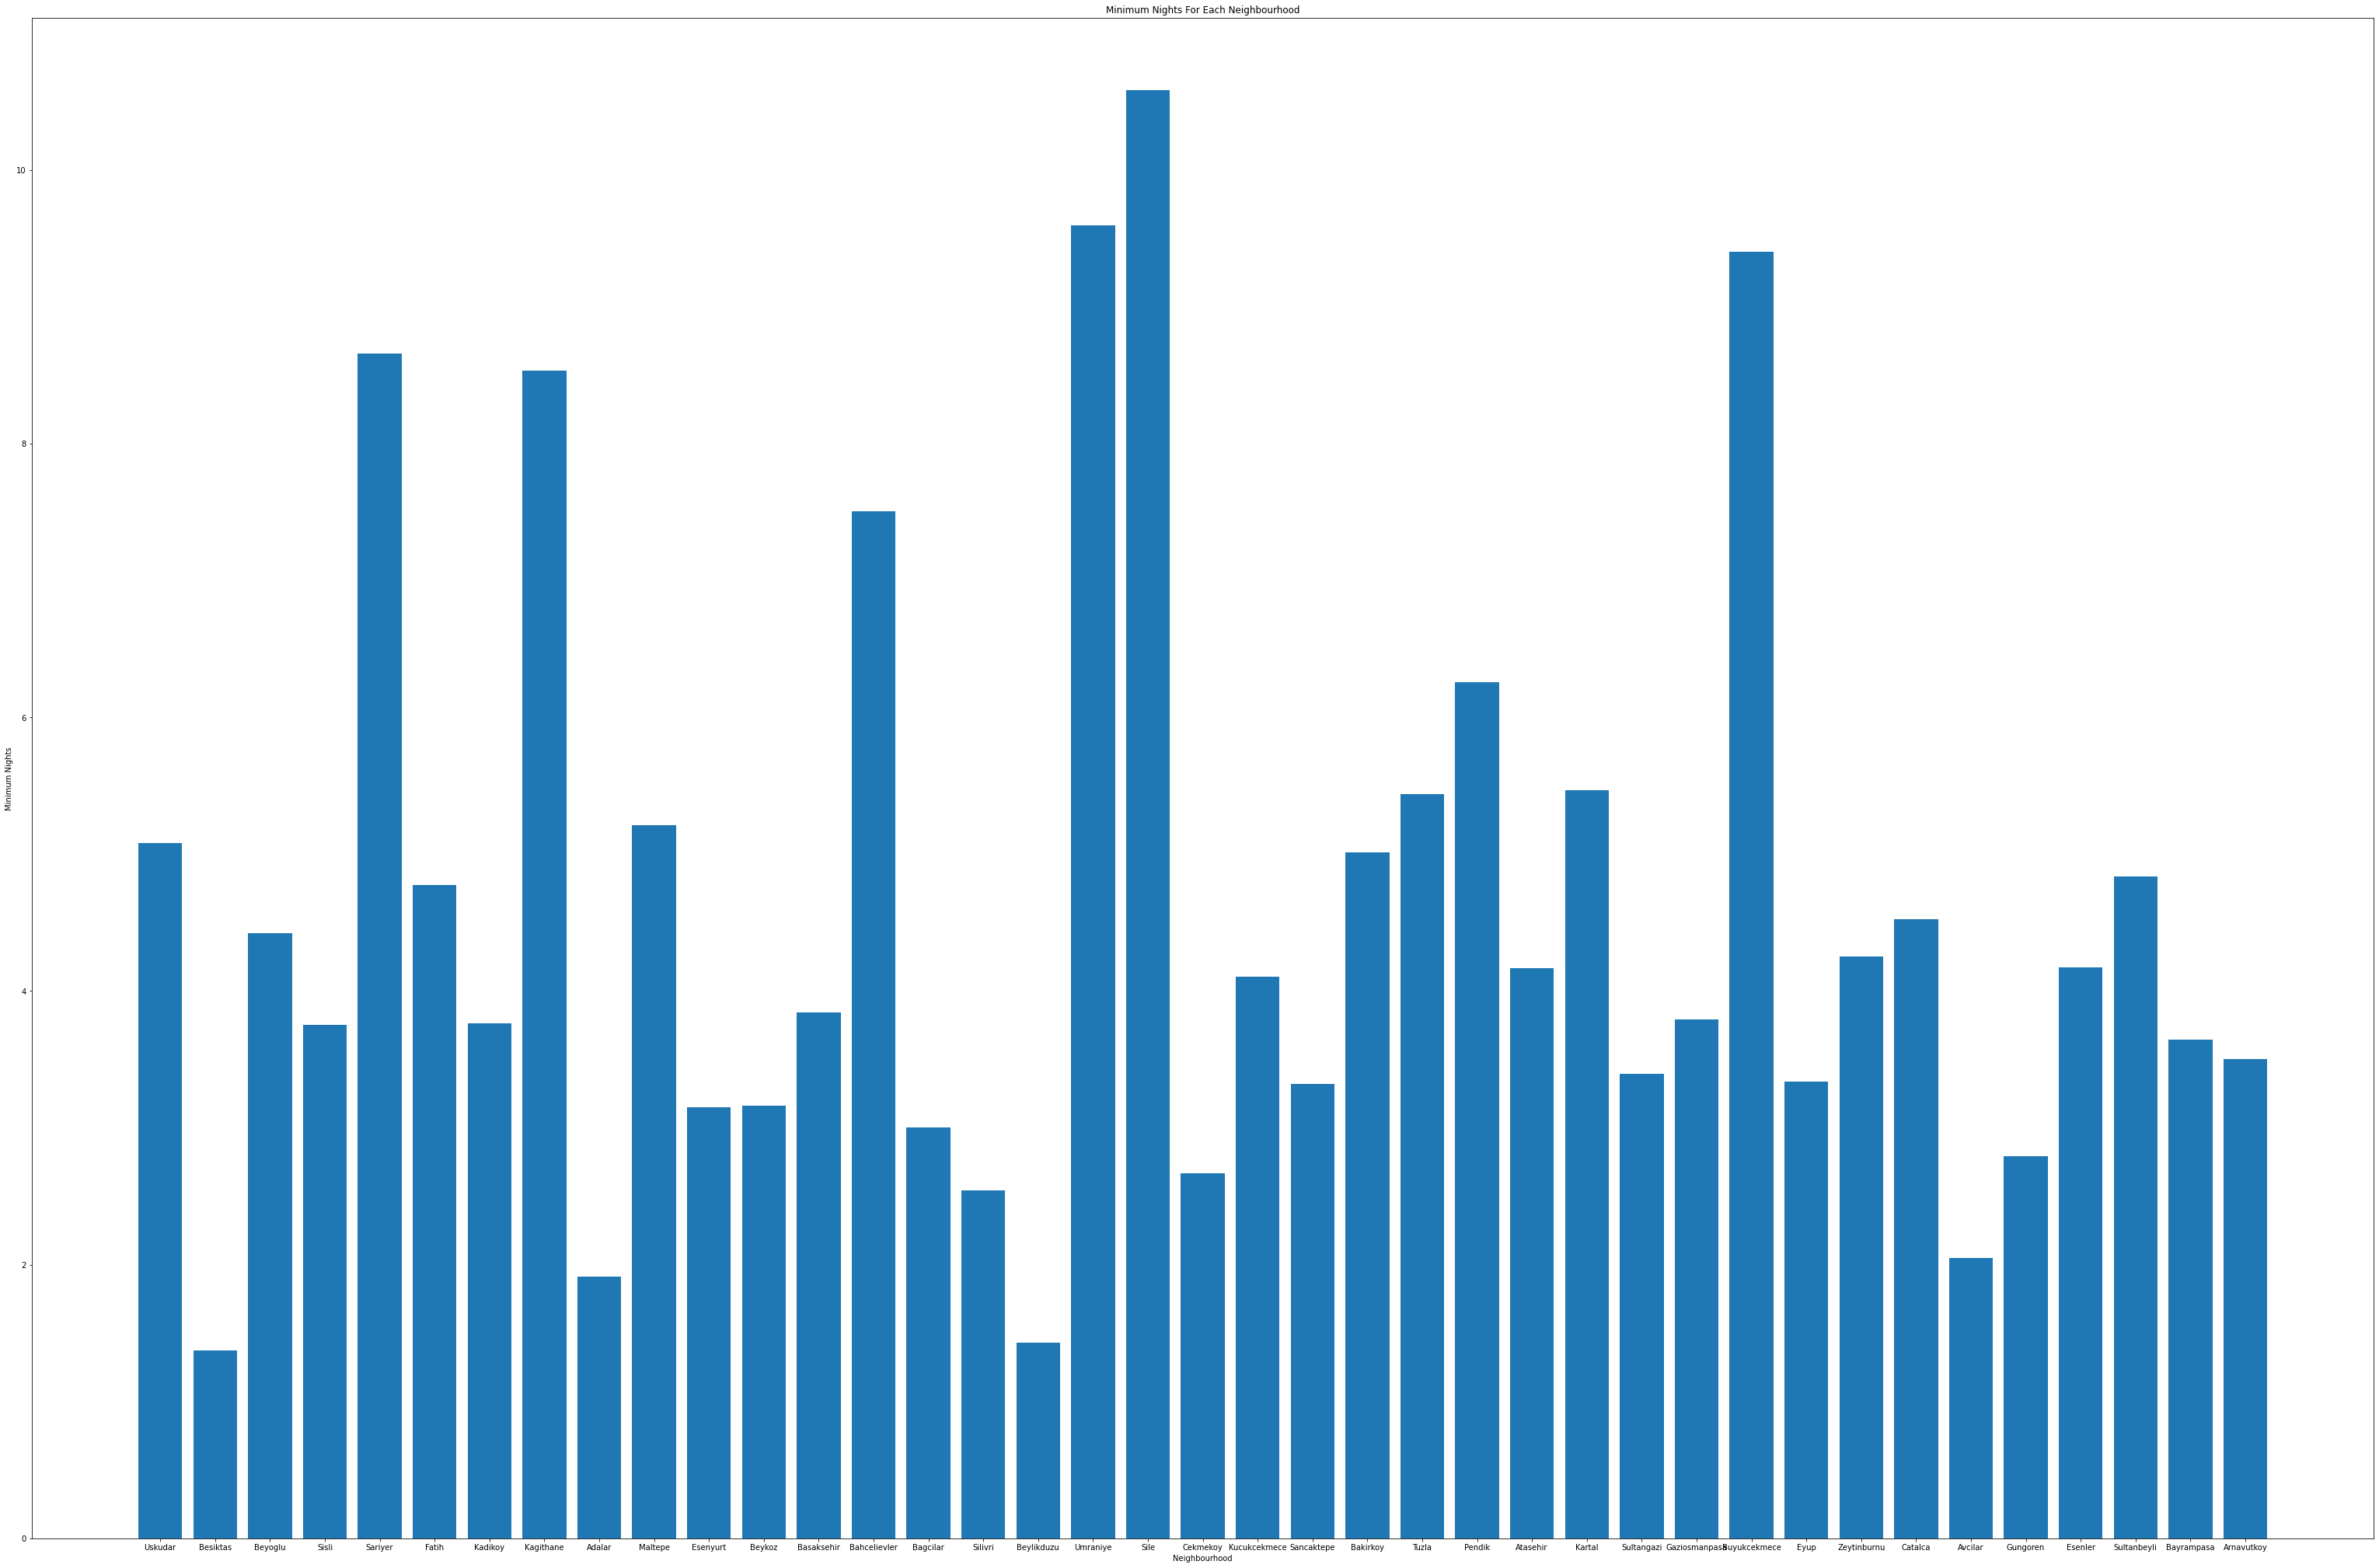

In [22]:
plt.figure(figsize=(54, 36))
meanNightMean = data['minimum_nights'].groupby([data.neighbourhood]).mean()
NeighbourhoodsKey = data.neighbourhood
NeighbourhoodsKey = NeighbourhoodsKey.drop_duplicates()
plt.bar(NeighbourhoodsKey, meanNightMean)
plt.xlabel('Neighbourhood')
plt.ylabel('Minimum Nights')
plt.title('Minimum Nights For Each Neighbourhood')
plt.show()


## Which district is the amount of household waste the most?

### Since the waste amounts are not given in number type in our data, let's first convert it to float type and then find the maximum value and find the most domestic waste amount in which neighbourhood.

In [23]:
wasteOf20 = data.iloc[:,[0,27]]
wasteOf20 = wasteOf20.drop_duplicates()
tmp = []
def convert(val):
    new_val = val.replace(',','.')
    new_val = float(new_val)
    tmp.append(new_val)

wasteOf20['2020'].apply(convert)
maxTmp = max(tmp)
maxTmp = str(maxTmp)
maxTmp = maxTmp.replace(".", ",")
maxData = wasteOf20[wasteOf20['2020'] == maxTmp]
maxData

,neighbourhood,2020
62,Esenyurt,"384,469"


## Based on our investigation, we have obtained the information that the highest amount of waste is in Esenyurt with 384,469.

## Which neighbourhood has the highest average wage?

### First of all, we need to extract the one-night data from the districts. Because the increase in the night price plays an important role in the increase in the price. We collected the average of our data in places where the minimum night is 1 by grouping them according to districts. Now, let's find out which is the maximum wage among these values and get its information.

In [24]:
meanNeighborhood = data[data["minimum_nights"] == 1].groupby([data.neighbourhood]).mean()
#meanNeighborhood.sort_values(by=['price'],inplace = True)
mostExpensiveValue = meanNeighborhood['price'].max()
expensiveNeighborhood = meanNeighborhood[meanNeighborhood["price"] == mostExpensiveValue]
expensiveNeighborhood

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,
Beykoz,41.104999,29.125939,1118.014925,1.0,1.253731,0.092537,4.089552,175.940299


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

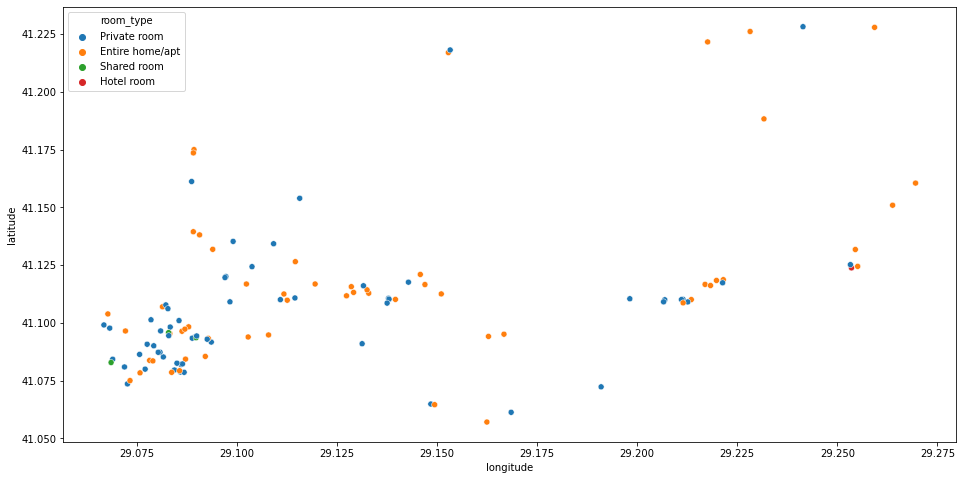

In [25]:
BeykozDatas = data[data["neighbourhood"] == "Beykoz"]
BeykozDatas
plt.figure(figsize=(16,8))
sea.scatterplot(x=BeykozDatas.longitude,y=BeykozDatas.latitude,hue=BeykozDatas.room_type)

### Let's examine the distribution of room types in Beykoz, our most expensive neighborhood.

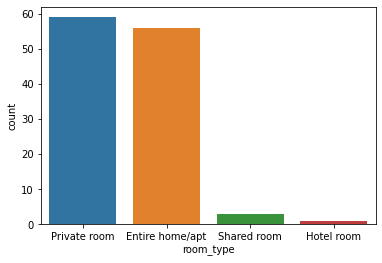

In [26]:
BeykozRoomType = sea.countplot(x="room_type", data=BeykozDatas)

In [27]:
BeykozDatas.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,41.111041,29.128309,1594.420168,3.151261,1.865546,0.115462,3.941176,198.445378
std,0.034636,0.057700,4669.803214,5.177590,5.447631,0.266731,17.160407,137.848154
min,41.057050,29.066820,41.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,41.090855,29.084750,117.000000,1.000000,0.000000,0.000000,1.000000,88.000000
50%,41.108550,29.102410,281.000000,1.000000,0.000000,0.000000,1.000000,179.000000
75%,41.117480,29.153075,1001.000000,2.000000,1.000000,0.090000,2.000000,362.500000
max,41.228260,29.269530,34618.000000,30.000000,37.000000,1.470000,176.000000,365.000000


### How much on average do we have to pay to rent a house in the most expensive neighborhood?

In [28]:
BeykozRoomTypePricesMean = BeykozDatas.price.groupby([BeykozDatas.room_type]).mean()
BeykozRoomTypePricesMean

room_type
Entire home/apt    2875.303571
Hotel room          117.000000
Private room        474.661017
Shared room         199.000000
Name: price, dtype: float64

### According to our research, we learned that Beykoz is the most expensive neighbourhood with an average price of 1118.

## Regression analysis to predict the price


### Let's convert room types and neighbourhood into columns and boolean values for better prediction and analysis.

### splitting the dataset into test and training data

In [29]:
data2 = pd.get_dummies(a, columns=categorical_col)
data2.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_Adalar,neighbourhood_Arnavutkoy,...,neighbourhood_Sultanbeyli,neighbourhood_Sultangazi,neighbourhood_Tuzla,neighbourhood_Umraniye,neighbourhood_Uskudar,neighbourhood_Zeytinburnu,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,41.05650,29.05367,720,1,1,0.01,1,365,0,0,...,0,0,0,0,1,0,1,0,0,0
1,41.06984,29.04545,816,365,41,0.33,2,279,0,0,...,0,0,0,0,0,0,1,0,0,0
2,41.03254,28.98153,233,30,13,0.19,1,289,0,0,...,0,0,0,0,0,0,1,0,0,0
3,41.04471,28.98567,761,3,0,0.00,19,365,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41.09048,29.05559,823,3,0,0.00,1,88,0,0,...,0,0,0,0,0,0,1,0,0,0


### Let's check the columns of seperated data

In [30]:
data2.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_Adalar', 'neighbourhood_Arnavutkoy',
       'neighbourhood_Atasehir', 'neighbourhood_Avcilar',
       'neighbourhood_Bagcilar', 'neighbourhood_Bahcelievler',
       'neighbourhood_Bakirkoy', 'neighbourhood_Basaksehir',
       'neighbourhood_Bayrampasa', 'neighbourhood_Besiktas',
       'neighbourhood_Beykoz', 'neighbourhood_Beylikduzu',
       'neighbourhood_Beyoglu', 'neighbourhood_Buyukcekmece',
       'neighbourhood_Catalca', 'neighbourhood_Cekmekoy',
       'neighbourhood_Esenler', 'neighbourhood_Esenyurt', 'neighbourhood_Eyup',
       'neighbourhood_Fatih', 'neighbourhood_Gaziosmanpasa',
       'neighbourhood_Gungoren', 'neighbourhood_Kadikoy',
       'neighbourhood_Kagithane', 'neighbourhood_Kartal',
       'neighbourhood_Kucukcekmece', 'neighbourhood_Maltepe',
       'neighbourhood_Pendik', 'neighb

### Let's check mean for each columns

In [31]:
print(data2.describe().loc["mean", :])

latitude                           41.028416
longitude                          28.982111
price                             484.643248
minimum_nights                      4.525202
number_of_reviews                   7.870828
reviews_per_month                   0.339794
calculated_host_listings_count      5.861767
availability_365                  227.709921
neighbourhood_Adalar                0.007544
neighbourhood_Arnavutkoy            0.002950
neighbourhood_Atasehir              0.017448
neighbourhood_Avcilar               0.009145
neighbourhood_Bagcilar              0.007460
neighbourhood_Bahcelievler          0.009988
neighbourhood_Bakirkoy              0.012517
neighbourhood_Basaksehir            0.011800
neighbourhood_Bayrampasa            0.001433
neighbourhood_Besiktas              0.073668
neighbourhood_Beykoz                0.005015
neighbourhood_Beylikduzu            0.005184
neighbourhood_Beyoglu               0.268543
neighbourhood_Buyukcekmece          0.005774
neighbourh

### Let's check standart deviation for each columns

In [32]:
print(data2.describe().loc["std", :])

latitude                             0.045713
longitude                            0.127503
price                             1973.884093
minimum_nights                      27.614191
number_of_reviews                   23.229127
reviews_per_month                    0.718269
calculated_host_listings_count      16.535368
availability_365                   146.607077
neighbourhood_Adalar                 0.086529
neighbourhood_Arnavutkoy             0.054236
neighbourhood_Atasehir               0.130935
neighbourhood_Avcilar                0.095195
neighbourhood_Bagcilar               0.086048
neighbourhood_Bahcelievler           0.099443
neighbourhood_Bakirkoy               0.111179
neighbourhood_Basaksehir             0.107989
neighbourhood_Bayrampasa             0.037827
neighbourhood_Besiktas               0.261236
neighbourhood_Beykoz                 0.070642
neighbourhood_Beylikduzu             0.071813
neighbourhood_Beyoglu                0.443211
neighbourhood_Buyukcekmece        

In [33]:
z=data2.drop(['price'],axis=1)
w=data2['price']
Z_train, Z_test, W_train, W_test = train_test_split(z, w, test_size=0.30, random_state=42)
data2.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_Adalar', 'neighbourhood_Arnavutkoy',
       'neighbourhood_Atasehir', 'neighbourhood_Avcilar',
       'neighbourhood_Bagcilar', 'neighbourhood_Bahcelievler',
       'neighbourhood_Bakirkoy', 'neighbourhood_Basaksehir',
       'neighbourhood_Bayrampasa', 'neighbourhood_Besiktas',
       'neighbourhood_Beykoz', 'neighbourhood_Beylikduzu',
       'neighbourhood_Beyoglu', 'neighbourhood_Buyukcekmece',
       'neighbourhood_Catalca', 'neighbourhood_Cekmekoy',
       'neighbourhood_Esenler', 'neighbourhood_Esenyurt', 'neighbourhood_Eyup',
       'neighbourhood_Fatih', 'neighbourhood_Gaziosmanpasa',
       'neighbourhood_Gungoren', 'neighbourhood_Kadikoy',
       'neighbourhood_Kagithane', 'neighbourhood_Kartal',
       'neighbourhood_Kucukcekmece', 'neighbourhood_Maltepe',
       'neighbourhood_Pendik', 'neighb

In [34]:
from sklearn import metrics
linear=LinearRegression()
linear.fit(Z_train,W_train)
W_pred=linear.predict(Z_test)
metrics.r2_score(W_test,W_pred)

0.026905103978877798

#### The accuracy we got is 0.02%.Our model is predicting that how price is varying in Istanbul on different features.

### Let's minimize data to make a price estimate for the latitude of Üsküdar district by taking only the latitude from our data.

In [35]:
data2.head(2)
X = data2.iloc[:,[0]]
y = data2.price.values.reshape(-1,1)
X = X.values.reshape(-1,1)
print(X.shape)
print(y.shape)

(23728, 1)
(23728, 1)


In [36]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X,y)
print(regression.predict(np.array([[41.09048]])))

[[625.83962352]]


### When we predicted based on the latitude of Üsküdar district, we estimated the price of 625.

### Let's visualize our price and predict

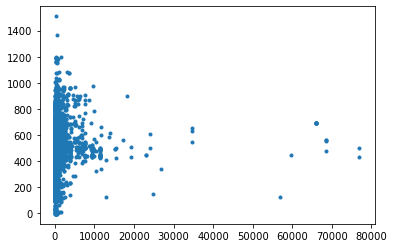

In [37]:
plt.plot(y,regression.predict(X), '.')
plt.show()

### Let's examine our error mean by using metrics

#### Mean Absolute Error (MAE) shows the difference between predictions and actual values.

In [38]:
def errors(real, predicted):  
    mae = metrics.mean_absolute_error(real, predicted)
    print('MAE:', mae)
errors(y, regression.predict(X))

MAE: 423.24458020223574


### Now, let's examine the annual domestic waste numbers according to the districts in Istanbul, which is our second dataset.

In [39]:
b.head(15)

,neighbourhood,Veri Türü (Data Type),2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Adalar,Miktar (Ton) (Amount),"7,834","10,615","17,228","12,102","12,232","13,228","11,884","12,109","12,077","12,886","23,531","12,004","12,711","12,604","14,898","16,718","11,466"
1,Arnavutkoy,Miktar (Ton) (Amount),"14,742","17,055","29,874","31,163","30,187","39,603","51,041","53,779","59,294","64,386","74,446","88,765","88,435","94,141","94,542","93,010","102,241"
2,Atasehir,Miktar (Ton) (Amount),"99,570","108,725","116,350","115,838","108,804","57,172","136,509","145,206","153,265","169,790","173,099","179,390","183,933","180,546","177,516","174,355","176,178"
3,Avcilar,Miktar (Ton) (Amount),"76,741","68,579","102,550","113,784","106,832","121,277","113,793","115,190","119,614","132,095","147,880","183,128","171,638","164,914","161,040","155,042","151,971"
4,Bahcelievler,Miktar (Ton) (Amount),"165,395","186,014","200,850","198,891","193,768","208,109","189,725","187,098","190,638","214,657","217,869","212,794","217,714","220,362","223,865","212,956","204,044"
5,Bagcilar,Miktar (Ton) (Amount),"192,223","205,455","244,660","249,504","231,711","262,991","232,660","231,675","234,106","261,596","269,005","262,812","280,921","282,823","294,619","278,547","278,086"
6,Bakirkoy,Miktar (Ton) (Amount),"79,952","96,202","100,950","102,793","95,940","115,591","110,031","105,868","120,737","148,860","152,493","159,072","156,268","147,539","146,725","121,614","100,248"
7,Basaksehir,Miktar (Ton) (Amount),"51,544","53,788","61,680","63,725","60,990","42,982","106,894","130,057","137,093","161,729","181,877","179,829","197,563","207,577","213,602","208,181","210,929"
8,Bayrampasa,Miktar (Ton) (Amount),"84,695","90,010","104,328","104,432","97,047","116,542","110,824","106,486","110,285","117,746","123,775","127,707","129,597","135,068","131,938","124,328","122,321"
9,Besiktas,Miktar (Ton) (Amount),"96,470","102,525","113,975","113,856","103,750","119,804","111,013","108,720","111,260","121,377","129,396","128,561","128,516","130,158","126,774","123,926","101,829"


### We do not need to use some columns, that's why we can drop them for better analysis and predict

In [40]:
b_copy = b.copy()
b_copy2 = b.copy()
b_copy.drop(['Veri Türü (Data Type)','neighbourhood'], axis=1, inplace=True)
b_copy2.drop(['Veri Türü (Data Type)'], axis=1, inplace=True)

### Since our columns do not come in number type in our data, let's move on by converting them to integer type and numpy array format first. Then we will fix (-1,1) with reshape to be able to regress.

In [41]:
columns = b_copy.columns
columns = np.array(columns)
columnsPlot = []
for p in columns:
    columnsPlot.append(int(p))
columns = columns.reshape(-1,1)
columnsPlot = np.array(columnsPlot)
columnsPlot

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020])

### In our previous analyzes, we saw that the highest amount of domestic waste was in Esenyurt, so let's choose Esenyurt again and make our predictions accordingly.

In [42]:
esenyurtWaste = []
tmp = b_copy.values[17]
tmp = np.array(tmp)
for value in tmp:
    newValue = value.replace(',','.')
    esenyurtWaste.append(float(newValue))
esenyurtWaste = np.array(esenyurtWaste)
esenyurtWaste = esenyurtWaste.reshape(-1,1)

### Let's visualize our data

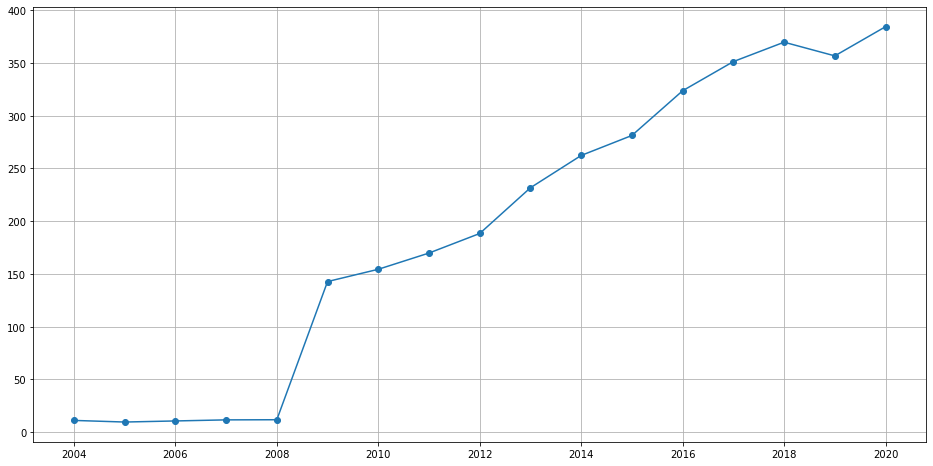

In [43]:
plt.figure(figsize=(16, 8))
plt.grid()
plt.plot(columnsPlot,esenyurtWaste, marker = 'o')
plt.show()

### Now, according to the data we have, let's estimate for 2021 and 2022 using linear regression.

In [44]:
regression = LinearRegression()
regression.fit(columns,esenyurtWaste)
print(regression.predict([[2021]]))
print(regression.predict([[2022]]))

[[439.7835]]
[[467.26743137]]


### Let's create a series by using arange function to create an array containing numbers starting from the specified starting value and incrementing the number of steps each time up to the end value 

#### We need to give the next value of maximum point where arange does not include the maximum point in the array

### Now let's draw a linear plot for our price by years.

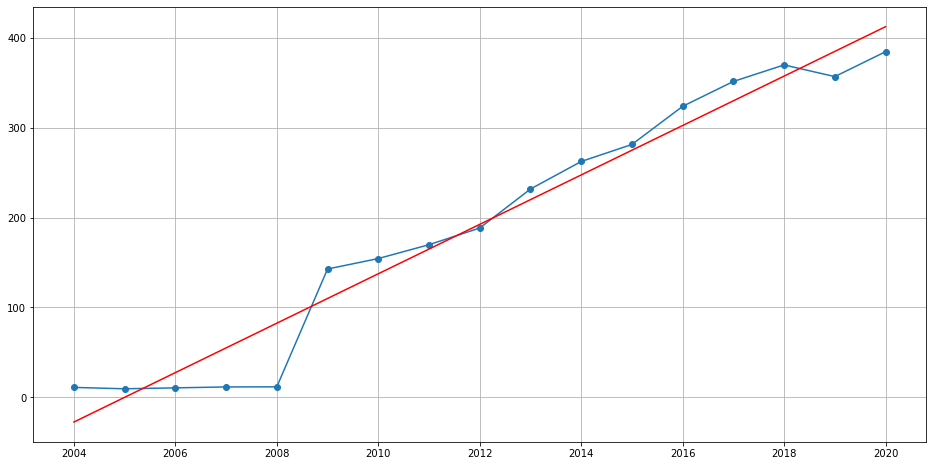

In [45]:
tmp2 = np.arange(min(columnsPlot),max(columnsPlot)+1).reshape(-1,1)
plt.figure(figsize=(16, 8))
plt.grid()
plt.plot(columnsPlot,esenyurtWaste, marker = 'o')
plt.plot(tmp2,regression.predict(tmp2),color="red")
plt.show()

### We did our investigations using linear regression. Let's examine it using polynomial regression.

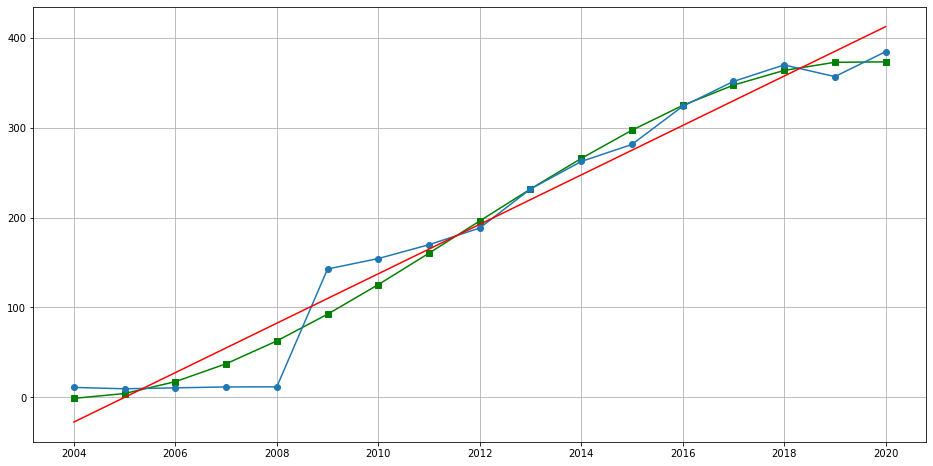

In [46]:
regression2 = LinearRegression()
columns_copy = columns.copy()
esenyurtWaste_copy = esenyurtWaste.copy()
regression2.fit(columns_copy,esenyurtWaste_copy)
regressionPoly = PolynomialFeatures(degree = 4)
columnsPoly = regressionPoly.fit_transform(columns_copy)
regression2.fit(columnsPoly,esenyurtWaste_copy)

plt.figure(figsize=(16, 8))
plt.grid()
plt.plot(tmp2,regression2.predict(columnsPoly), 'gs-')
plt.plot(columnsPlot,esenyurtWaste, marker = 'o')
plt.plot(tmp2,regression.predict(tmp2),color="red")
plt.show()

[[363.98431838]] [[343.87940633]] [[311.69155514]]


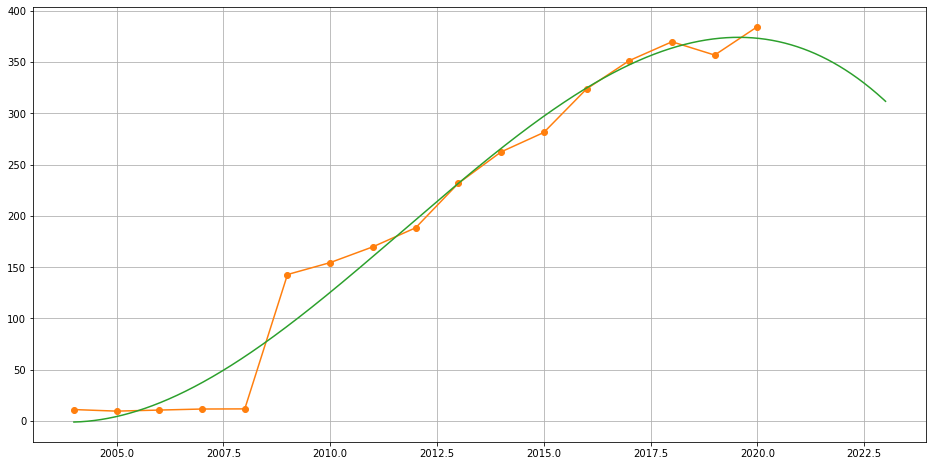

In [47]:
from sklearn.pipeline import make_pipeline
plt.figure(figsize=(16, 8))
xfit = np.linspace(2004,2023,2023).reshape(-1,1)
poly_model = make_pipeline(PolynomialFeatures(4),LinearRegression())
poly_model.fit(columnsPlot.reshape(17,1),esenyurtWaste)
yfit = poly_model.predict(xfit)
plt.plot(columnsPlot, esenyurtWaste,'.')
plt.plot(columnsPlot,esenyurtWaste, marker = 'o')
plt.grid()
plt.plot(xfit, yfit);

estimate1 = regression2.predict(regressionPoly.fit_transform([[2021]]))
estimate2 = regression2.predict(regressionPoly.fit_transform([[2022]]))
estimate3 = regression2.predict(regressionPoly.fit_transform([[2023]]))
print(estimate1,estimate2,estimate3)

# Hypothesis

## Waste is higher in the district where real estate advertisements are the most.

#### In our previous examinations, we saw that Beyoğlu had the most advertisements. Let's compare our values and apply our tests for Beyoğlu and Esenyurt, where the most household waste is located.

In [48]:
BeyogluWaste = b_copy['2020'].values[12]
EsenyurtWaste = b_copy['2020'].values[17]
print("Waste of Beyoglu for 20020:",BeyogluWaste)
print("Waste of Esenyurt for 20020:",EsenyurtWaste)

Waste of Beyoglu for 20020: 115,602
Waste of Esenyurt for 20020: 384,469


#### When we look at the number of waste, we see that although Beyoglu has much more ads than Esenyurt, it has less than half of Esenyurt in terms of domestic waste.

## The amount of domestic waste in 2019 is more than the amount of domestic waste in 2020

In [49]:
tmp20 = b_copy['2020']
tmp19 = b_copy['2019']
waste20 = []
waste19 = []
for value in tmp20:
    newValue = value.replace(',','.')
    waste20.append(float(newValue))
for value in tmp19:
    newValue = value.replace(',','.')
    waste19.append(float(newValue))

## Shapiro Test

#### Now let's apply the shapiro test and evaluate our hypothesis.

In [50]:
shapiro_result = stats.shapiro(waste20)
shapiroTable = {'DF':[len(shapiro_result) - 1],
         'Test Statistic':[shapiro_result[0]],
         'p-Value':[shapiro_result[1]]}
result = pd.DataFrame(shapiroTable)
result

,DF,Test Statistic,p-Value
0,1,0.934116,0.024403


#### For waste of 2020, we see that our p-value is less than 0.05 and according to this result, we can say that it does not have a normal distribution.

In [51]:
shapiro_result = stats.shapiro(waste19)
shapiroTable = {'DF':[len(shapiro_result) - 1],
         'Test Statistic':[shapiro_result[0]],
         'p-Value':[shapiro_result[1]]}
result = pd.DataFrame(shapiroTable)
result

,DF,Test Statistic,p-Value
0,1,0.951832,0.094731


 #### For waste of 2019, we see that the p value is greater than 0.05 and according to this result, we can say that it has a normal distribution. Now, let's apply the additional t-test for the correctness of our hypothesis.

In [52]:
print(stats.ttest_ind(waste19, waste20, equal_var=True))

Ttest_indResult(statistic=0.015396264768454803, pvalue=0.9877563899244018)


#### In the t-test, we see that the p-value value is greater than 0.05. Based on this result, I accept the N0 hypothesis.

### Previously, we found the 6 neighbourhood with the most advertisements. Now, let's examine the amount of domestic waste in these 6 neighbourhood year by year and observe the change between 2019 and 2020.

### First, let's pull our relevant data from our dataset and the relevant columns of this data.

In [53]:
# 'Beyoglu', 'Sisli', 'Fatih', 'Kadikoy', 'Besiktas', 'Uskudar'
Beyoglu_data = b_copy2[b_copy2["neighbourhood"] == "Beyoglu"]
Sisli_data = b_copy2[b_copy2["neighbourhood"] == "Sisli"]
Fatih_data = b_copy2[b_copy2["neighbourhood"] == "Fatih"]
Kadikoy_data = b_copy2[b_copy2["neighbourhood"] == "Kadikoy"]
Besiktas_data = b_copy2[b_copy2["neighbourhood"] == "Besiktas"]
Uskudar_data = b_copy2[b_copy2["neighbourhood"] == "Uskudar"]
Beyoglu_data = Beyoglu_data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
Sisli_data = Sisli_data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
Fatih_data = Fatih_data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
Kadikoy_data = Kadikoy_data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
Besiktas_data = Besiktas_data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
Uskudar_data = Uskudar_data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]


### I am converting it to numpy array format in order to be able to operate on our data more easily.

In [54]:
Beyoglu_data = np.array(Beyoglu_data)
Sisli_data = np.array(Sisli_data)
Fatih_data = np.array(Fatih_data)
Kadikoy_data = np.array(Kadikoy_data)
Besiktas_data = np.array(Besiktas_data)
Uskudar_data = np.array(Uskudar_data)

### Now let's do our operations on our data and divide it into different arrays.

In [55]:
Beyoglu_waste = []
Sisli_waste = []
Fatih_waste = []
Kadikoy_waste = []
Besiktas_waste = []
Uskudar_waste = []
Beyoglu_data = Beyoglu_data.reshape(17,1)
Sisli_data = Sisli_data.reshape(17,1)
Fatih_data = Fatih_data.reshape(17,1)
Kadikoy_data = Kadikoy_data.reshape(17,1)
Besiktas_data = Besiktas_data.reshape(17,1)
Uskudar_data = Uskudar_data.reshape(17,1)
for val in Beyoglu_data:
    val = str(val[0])
    newValue = val.replace(',','.')
    Beyoglu_waste.append(float(newValue))
for val in Sisli_data:
    val = str(val[0])
    newValue = val.replace(',','.')
    Sisli_waste.append(float(newValue))
for val in Fatih_data:
    val = str(val[0])
    newValue = val.replace(',','.')
    Fatih_waste.append(float(newValue))
for val in Kadikoy_data:
    val = str(val[0])
    newValue = val.replace(',','.')
    Kadikoy_waste.append(float(newValue))
for val in Besiktas_data:
    val = str(val[0])
    newValue = val.replace(',','.')
    Besiktas_waste.append(float(newValue))
for val in Uskudar_data:
    val = str(val[0])
    newValue = val.replace(',','.')
    Uskudar_waste.append(float(newValue))
Beyoglu_waste = np.array(Beyoglu_waste)
Beyoglu_waste = Beyoglu_waste.reshape(-1,1)
Sisli_waste = np.array(Sisli_waste)
Sisli_waste = Sisli_waste.reshape(-1,1)
Fatih_waste = np.array(Fatih_waste)
Fatih_waste = Fatih_waste.reshape(-1,1)
Kadikoy_waste = np.array(Kadikoy_waste)
Kadikoy_waste = Kadikoy_waste.reshape(-1,1)
Besiktas_waste = np.array(Besiktas_waste)
Besiktas_waste = Besiktas_waste.reshape(-1,1)
Uskudar_waste = np.array(Uskudar_waste)
Uskudar_waste = Uskudar_waste.reshape(-1,1)

### Finally, let's divide the data we have obtained and in addition to these, let's add the district of Esenyurt, which has the most domestic waste, to our graph.

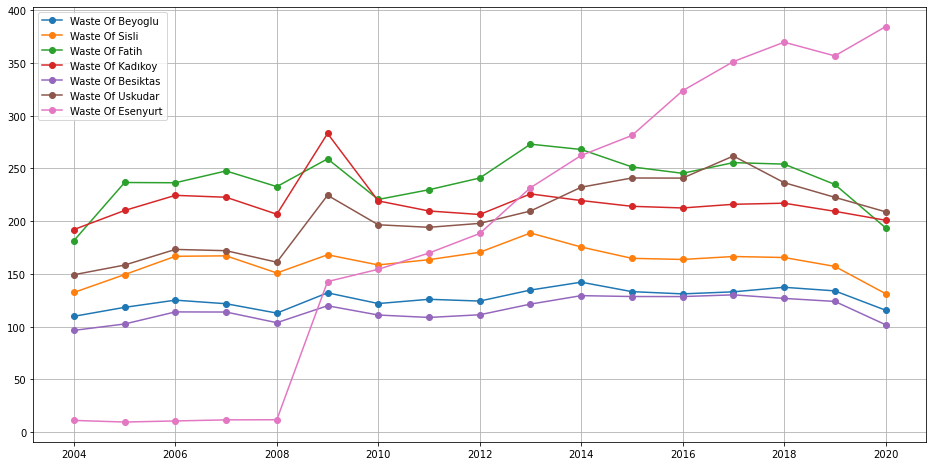

In [56]:
plt.figure(figsize=(16, 8))
plt.grid()
plt.plot(columnsPlot,Beyoglu_waste, marker = 'o')
plt.plot(columnsPlot,Sisli_waste, marker = 'o')
plt.plot(columnsPlot,Fatih_waste, marker = 'o')
plt.plot(columnsPlot,Kadikoy_waste, marker = 'o')
plt.plot(columnsPlot,Besiktas_waste, marker = 'o')
plt.plot(columnsPlot,Uskudar_waste, marker = 'o')
plt.plot(columnsPlot,esenyurtWaste, marker = 'o')
plt.legend(['Waste Of Beyoglu','Waste Of Sisli','Waste Of Fatih','Waste Of Kadıkoy',
            'Waste Of Besiktas','Waste Of Uskudar','Waste Of Esenyurt'])
plt.show()


#### We have observed the changes in the amount of domestic waste for the 6 most popular neighborhoods and Esenyurt neighborhoods with the most domestic waste. For the 6 most popular neighborhoods, we observe a decline between 2019 and 2020.

# Conclusion

### As a result, by answering multiple questions about our airbnb data, we examined the factors affecting house prices about our data and about districts. We have seen that the price averages depending on the districts and the prices of the houses change depending on the characteristics. We had the opportunity to make different comparisons for all districts by visualizing our data. In addition to our Airbnb data, we added the amount of household waste to our airbnb data and tried to find an interaction between them. One of our hypotheses was that the amount of waste might be higher in the district with too many advertisements. When we checked our values, we saw that this was not the case. In addition, we made predictions for the coming years depending on the amount of waste and made our visualizations accordingly.

# References
### https://medium.com/codex/house-price-prediction-with-machine-learning-in-python-cf9df744f7ff